## Zadanie 1

In [1]:
import pandas as pd
import math

In [2]:
d = {
    'wiek': [23, 25, 28, 22, 46, 50, 48],
    'waga': [75, 67, 120, 65, 70, 68, 97],
    'wzrost': [176, 180, 175, 165, 187, 180, 178],
    'gra': [True, True, False, True, True, False, False]
}
df = pd.DataFrame(data=d)
df

,wiek,waga,wzrost,gra
0,23,75,176,True
1,25,67,180,True
2,28,120,175,False
3,22,65,165,True
4,46,70,187,True
5,50,68,180,False
6,48,97,178,False


In [3]:
def forwardPass(wiek, waga, wzrost):
    hidden1 = wiek*(-0.46122) + waga*0.97314 + wzrost*(-0.39203) + 0.80109
    hidden1_po_aktywacji = 1/(1+math.exp(-hidden1)) * (-0.81546)
    hidden2 = wiek*0.78548 + waga*2.10584 + wzrost*(-0.57847) + 0.43529
    hidden2_po_aktywacji = 1/(1+math.exp(-hidden2)) * 1.03775
    output = hidden1_po_aktywacji + hidden2_po_aktywacji - 0.2368
    return output

In [4]:
forwardPass(23, 75, 176) # 0.798528

0.7985341880063129

In [5]:
forwardPass(22, 65, 175)

0.8009496622309037

## Zadanie 2

In [6]:
import numpy as np
import seaborn as sns # visualization
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics

### a)

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

In [8]:
# splitting into train and test datasets
from sklearn.model_selection import train_test_split

datasets = train_test_split(iris.data, iris.target, test_size=0.3)

### b)

In [9]:
train_data, test_data, train_labels, test_labels = datasets

In [10]:
train_labels

array([0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0])

### c) skalowanie

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[-0.56510933  0.87701676 -1.20028945 -1.3309167 ]
 [ 1.08640302  0.40598474  1.18192318  1.44812811]
 [-1.50883067  0.40598474 -1.37044749 -1.3309167 ]]


### d)

In [12]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

C:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)

### e)

In [13]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.8571428571428571
0.9555555555555556


### f)

In [14]:
mlp1 = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000)

mlp1.fit(train_data, train_labels)

C:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000)

In [15]:
predictions_train = mlp1.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp1.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.9619047619047619
0.9777777777777777


### g)

In [16]:
mlp2 = MLPClassifier(hidden_layer_sizes=(3, 3,), max_iter=1000)

mlp2.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000)

In [17]:
predictions_train = mlp2.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp2.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.3238095238095238
0.35555555555555557


In [18]:
# najwyższe accuracy na zbiorze testowym ma model z dwiema warstwami neuronowymi, po 3 neurony każda

## Zadanie 3

In [19]:
df = pd.read_csv("data/diabetes.csv")
print(df)

     pregnant-times  glucose-concentr  blood-pressure  skin-thickness  \
0                 6               148              72              35   
1                 1                85              66              29   
2                 8               183              64               0   
3                 1                89              66              23   
4                 0               137              40              35   
..              ...               ...             ...             ...   
763              10               101              76              48   
764               2               122              70              27   
765               5               121              72              23   
766               1               126              60               0   
767               1                93              70              31   

     insulin  mass-index  pedigree-func  age            class  
0          0        33.6          0.627   50  tested_positi

In [20]:
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
pregnant-times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose-concentr,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood-pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin-thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass-index,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree-func,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


### a)

In [21]:
target_column = ['class'] # creates an object of the target variable
predictors = list(set(list(df.columns))-set(target_column)) # gives the list of all the features, excluding the target variable
df[predictors] = df[predictors]/df[predictors].max() # normalizes the predictors
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnant-times,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
glucose-concentr,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
blood-pressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
skin-thickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
mass-index,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
pedigree-func,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0


In [22]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


### b) i c)

In [23]:
from sklearn.neural_network import MLPClassifier

# 'hidden_layer_sizes' argument set to 2 layers, first with 6 neurons, second with 3 neurons
# 'relu' as the activation function and 'adam' as the solver for weight optimization
mlp = MLPClassifier(hidden_layer_sizes=(6,3), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

C:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### d)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[127  15]
 [ 43  46]]
                 precision    recall  f1-score   support

tested_negative       0.75      0.89      0.81       142
tested_positive       0.75      0.52      0.61        89

       accuracy                           0.75       231
      macro avg       0.75      0.71      0.71       231
   weighted avg       0.75      0.75      0.74       231



In [25]:
print(accuracy_score(predict_train, y_train))
print(accuracy_score(predict_test, y_test))

0.776536312849162
0.7489177489177489


## Zadanie 4

### a)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [27]:
# pip install keras
# pip install --user tensorflow

In [28]:
df = pd.read_csv('data/diabetes.csv') 
print(df.shape)
df.describe()

(768, 9)


,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [29]:
target_column = ['class']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df[target_column] = df[target_column].replace(['tested_positive', 'tested_negative'], ['1', '0'])

In [31]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [33]:
model = Sequential()
# ‘relu’ - the rectified linear unit function, returns f(x) = max(0, x)
model.add(Dense(500, activation='relu', input_dim = 8))
model.add(Dense(100, activation='relu', input_dim = 6))
model.add(Dense(50, activation='relu', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', # ‘adam’ - stochastic gradient-based optimizer
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# build the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 5ms/step - loss: 0.6591 - accuracy: 0.6667
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6284 - accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6059 - accuracy: 0.6834
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.6983
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7207
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5365 - accuracy: 0.7449
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5041 - accuracy: 0.7561
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5007 - accuracy: 0.7747
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7486
Epoch 10/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5221 - accuracy: 0.7337
Epoch 11/20
17/17 [

In [35]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

17/17 [==============================] - 0s 2ms/step
Accuracy on training data: 0.8044692873954773% 
 Error on training data: 0.1955307126045227
8/8 [==============================] - 0s 3ms/step
Accuracy on test data: 0.7575757503509521% 
 Error on test data: 0.24242424964904785


In [36]:
y_prediction = np.argmax(pred_test, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
print(confusion_matrix(y_test1, y_prediction))

[[123  19]
 [ 37  52]]


### b)

In [37]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, shuffle=True)

Epoch 1/20
14/14 [==============================] - 0s 13ms/step - loss: 0.4395 - accuracy: 0.7949 - val_loss: 0.3809 - val_accuracy: 0.8333
Epoch 2/20
14/14 [==============================] - 0s 10ms/step - loss: 0.4549 - accuracy: 0.7855 - val_loss: 0.4212 - val_accuracy: 0.7778
Epoch 3/20
14/14 [==============================] - 0s 10ms/step - loss: 0.4626 - accuracy: 0.7762 - val_loss: 0.4710 - val_accuracy: 0.7778
Epoch 4/20
14/14 [==============================] - 0s 11ms/step - loss: 0.4633 - accuracy: 0.7552 - val_loss: 0.4590 - val_accuracy: 0.7778
Epoch 5/20
14/14 [==============================] - 0s 12ms/step - loss: 0.4390 - accuracy: 0.7972 - val_loss: 0.3992 - val_accuracy: 0.7963
Epoch 6/20
14/14 [==============================] - 0s 12ms/step - loss: 0.4311 - accuracy: 0.8065 - val_loss: 0.4162 - val_accuracy: 0.7778
Epoch 7/20
14/14 [==============================] - 0s 11ms/step - loss: 0.4465 - accuracy: 0.7949 - val_loss: 0.4354 - val_accuracy: 0.7778
Epoch 8/20
14

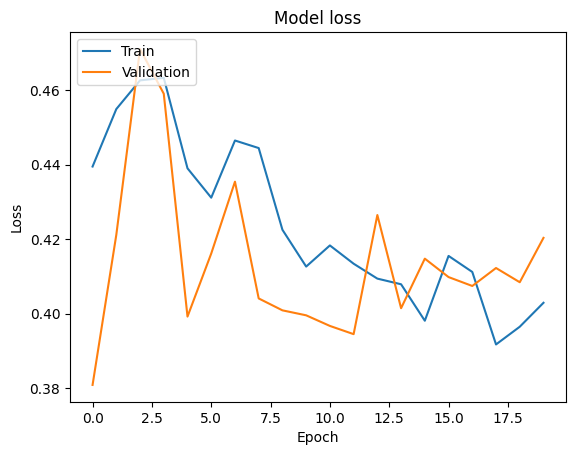

In [38]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### c)

In [39]:
# model jest przeuczony, sieć zbyt dokładnie nauczyła się zbioru treningowego,
# więc popełnia więcej błędów na zbiorze walidacyjnym
# (wykres straty zbioru walidacyjnego jest nad krzywą straty zbioru treningowego)
# trenowanie powinno się przerwać w pewnym momencie

### d)

In [40]:
# optimizer = {‘RMSprop’, ‘sgd’, ‘nadam’ ‘adam’}
# adam wydaje się być najlepszy, nadam ma zbliżone wyniki

In [41]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 8))
model.add(Dense(100, activation='relu', input_dim = 6))
model.add(Dense(50, activation='relu', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='RMSprop', # implements the RMSprop algorithm
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=20)

pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

y_prediction = np.argmax(pred_test, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
print(confusion_matrix(y_test1, y_prediction))

Epoch 1/20
17/17 [==============================] - 1s 6ms/step - loss: 0.6558 - accuracy: 0.6667
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6333 - accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6035 - accuracy: 0.6890
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.5865 - accuracy: 0.7039
Epoch 5/20
17/17 [==============================] - 0s 12ms/step - loss: 0.5662 - accuracy: 0.7225
Epoch 6/20
17/17 [==============================] - 0s 12ms/step - loss: 0.5550 - accuracy: 0.7188
Epoch 7/20
17/17 [==============================] - 0s 12ms/step - loss: 0.5415 - accuracy: 0.7393
Epoch 8/20
17/17 [==============================] - 0s 11ms/step - loss: 0.5293 - accuracy: 0.7356
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5077 - accuracy: 0.7635
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5240 - accuracy: 0.7430
Epoch 11/20
17

In [42]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 8))
model.add(Dense(100, activation='relu', input_dim = 6))
model.add(Dense(50, activation='relu', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', # Gradient descent (with momentum)
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=20)

pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

y_prediction = np.argmax(pred_test, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
print(confusion_matrix(y_test1, y_prediction))

Epoch 1/20
17/17 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.6331
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6636 - accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6667
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6667
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6667
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6420 - accuracy: 0.6667
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6667
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.6667
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6379 - accuracy: 0.6667
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6365 - accuracy: 0.6667
Epoch 11/20
17/17 [

In [43]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 8))
model.add(Dense(100, activation='relu', input_dim = 6))
model.add(Dense(50, activation='relu', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='nadam', # Adam with Nesterov momentum
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=20)

pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

y_prediction = np.argmax(pred_test, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
print(confusion_matrix(y_test1, y_prediction))

Epoch 1/20
17/17 [==============================] - 3s 4ms/step - loss: 0.6614 - accuracy: 0.6518
Epoch 2/20
17/17 [==============================] - 0s 12ms/step - loss: 0.6329 - accuracy: 0.6704
Epoch 3/20
17/17 [==============================] - 0s 14ms/step - loss: 0.6062 - accuracy: 0.6816
Epoch 4/20
17/17 [==============================] - 0s 12ms/step - loss: 0.5732 - accuracy: 0.7095
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5492 - accuracy: 0.7058
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5168 - accuracy: 0.7486
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.4899 - accuracy: 0.7598
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.7784
Epoch 9/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.7784
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4616 - accuracy: 0.7896
Epoch 11/20
17/1

In [44]:
# activation = {‘sigmoid’, ‘tanh’, ‘relu’}
# relu ma najlepsze wyniki, później tanh, na końcu sigmoid

In [45]:
model = Sequential()
# ‘sigmoid’ - the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x))
model.add(Dense(500, activation='sigmoid', input_dim = 8))
model.add(Dense(100, activation='sigmoid', input_dim = 6))
model.add(Dense(50, activation='sigmoid', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=20)

pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

y_prediction = np.argmax(pred_test, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
print(confusion_matrix(y_test1, y_prediction))

Epoch 1/20
17/17 [==============================] - 1s 4ms/step - loss: 0.6780 - accuracy: 0.5922
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6383 - accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6375 - accuracy: 0.6667
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6667
Epoch 5/20
17/17 [==============================] - 0s 11ms/step - loss: 0.6415 - accuracy: 0.6667
Epoch 6/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6438 - accuracy: 0.6667
Epoch 7/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6368 - accuracy: 0.6667
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6352 - accuracy: 0.6667
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.6667
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6383 - accuracy: 0.6667
Epoch 11/20
17/1

In [46]:
model = Sequential()
# ‘tanh’ - the hyperbolic tan function, returns f(x) = tanh(x)
model.add(Dense(500, activation='tanh', input_dim = 8))
model.add(Dense(100, activation='tanh', input_dim = 6))
model.add(Dense(50, activation='tanh', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=20)

pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

y_prediction = np.argmax(pred_test, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
print(confusion_matrix(y_test1, y_prediction))

Epoch 1/20
17/17 [==============================] - 1s 5ms/step - loss: 0.6455 - accuracy: 0.6480
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5882 - accuracy: 0.6983
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5619 - accuracy: 0.7244
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5448 - accuracy: 0.7672
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5132 - accuracy: 0.7505
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5219 - accuracy: 0.7486
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5085 - accuracy: 0.7523
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4999 - accuracy: 0.7616
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4842 - accuracy: 0.7728
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4752 - accuracy: 0.7765
Epoch 11/20
17/17 [

### e)

In [47]:
#pip install ann_visualizer
#pip install pydot
#pip install graphviz

In [48]:
from keras.utils.vis_utils import plot_model

model = Sequential()
# ‘relu’ - the rectified linear unit function, returns f(x) = max(0, x)
model.add(Dense(500, activation='relu', input_dim = 8))
model.add(Dense(100, activation='relu', input_dim = 6))
model.add(Dense(50, activation='relu', input_dim = 3))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', # ‘adam’ - stochastic gradient-based optimizer
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 500)               4500      
                                                                 
 dense_25 (Dense)            (None, 100)               50100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 2)                 102       
                                                                 
Total params: 59,752
Trainable params: 59,752
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 6ms/step - loss: 0.6605 - accuracy: 0.6480
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6279 - accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5986 - accuracy: 0.6797
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5760 - accuracy: 0.7225
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5404 - accuracy: 0.7300
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5222 - accuracy: 0.7598
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.4934 - accuracy: 0.7672
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.4827 - accuracy: 0.7672
Epoch 9/20
17/17 [==============================] - 0s 8ms/step - loss: 0.4880 - accuracy: 0.7877
Epoch 10/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.7803
Epoch 11/20
17/17 [

In [51]:
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, title="My first neural network")